# THE SPARKS FOUNDATION #GRIPJUNE2021 

# TASK 1 - PREDICTION USING SUPERVISED ML

# BY : RITHIKA RAVI

In [3]:
#IMPORTED REQUIRED LIBRARIES
import pandas as pd
import numpy as np  
import os
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

In [4]:
#READING DATA FROM CSV
data = pd.read_csv("Student.csv")
print("DATA IMPORTED SUCCESSFULLY")

DATA IMPORTED SUCCESSFULLY


In [6]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### To see the shape of data's distribution we use histogram to graphically summarize the distribution of a dataset

array([[<AxesSubplot:title={'center':'Hours'}>,
        <AxesSubplot:title={'center':'Scores'}>]], dtype=object)

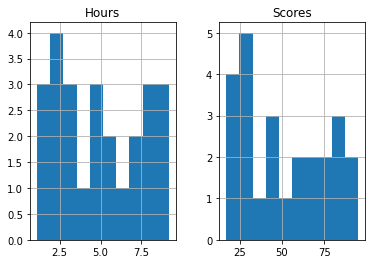

In [9]:
data.hist()

#### Pairwise relationship in the dataset using pairplot

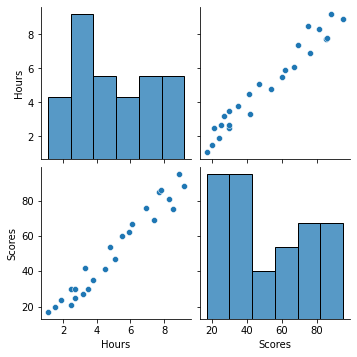

In [10]:
sns.pairplot(data)

#### Here the heatmap shows positive correlation between the Hours column and Scores column.

<AxesSubplot:>

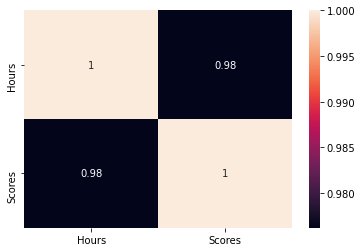

In [23]:
sns.heatmap(data.corr(),annot=True)

### Now let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:



<AxesSubplot:xlabel='Hours'>

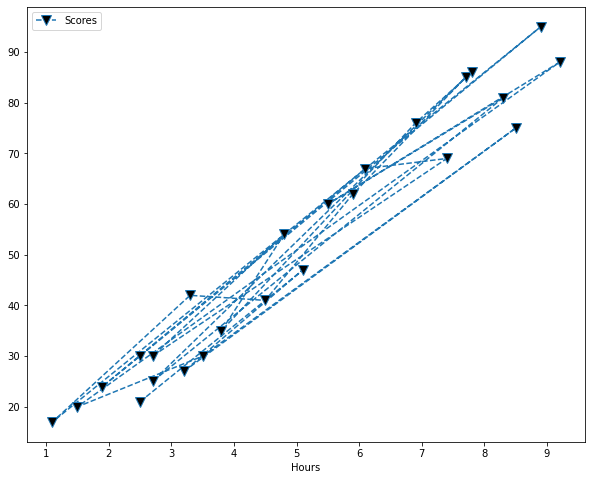

In [29]:
data.plot("Hours","Scores",linestyle = "--",marker = "v",markersize = "10",markerfacecolor = "black", figsize=(10,8))

### Plotting the distribution of scores  

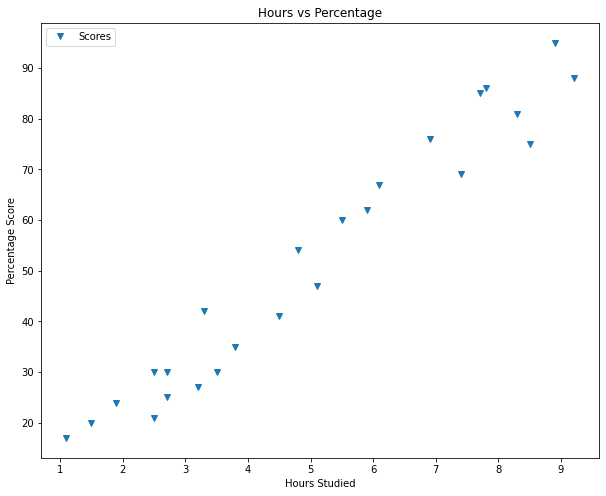

In [28]:
data.plot(x='Hours', y='Scores', style='v', figsize=(10,8))  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### Preparing the data 

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [13]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [14]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

## Creating and Training the Algorithm

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [15]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training completed")

Training completed


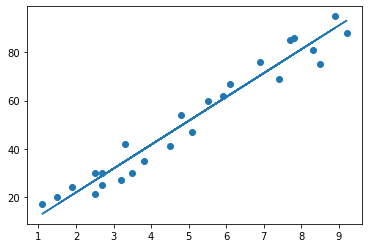

In [16]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Making predictions

Now that we have trained our algorithm, let's make some predictions.

In [17]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [18]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  

In [19]:
#displaying the Actual vs Predicted 
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [20]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


Therfore, the predicted score if a student studies for 9.25 hrs/day is about 93.69.

## Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.

## Regression evaluation metrics
- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

In [21]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
MSE: 21.5987693072174
RMSE: 4.6474476121003665


### Thus we have successfully predicted the percentage of an student based on no of study hours

# THANK YOU!